In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/haiyen040602/KPDLHLV/master/merged_data_ver6.csv')
# df2 = pd.read_csv('https://raw.githubusercontent.com/haiyen040602/KPDLHLV/master/merged_ver2.csv', index_col=0)


In [2]:
df.isnull().sum()

sim_number               0
sim_doi_1                0
sim_doi_2                0
sim_doi_3                0
sim_doi_4                0
sim_tam_hoa_1            0
sim_tam_hoa_2            0
sim_tam_hoa_3            0
sim_tu_quy_1             0
sim_tu_quy_2             0
sim_ngu_quy              0
sim_luc_quy              0
sim_that_quy             0
sim_bat_quy              0
sim_cuu_quy              0
quy_o_cuoi               0
sim_abab                 0
sim_ababab_abcabc        0
sim_abababab_abcdabcd    0
sim_abcabcabc            0
sim_than_tai             0
sim_loc_phat             0
sim_ong_dia              0
sim_tien_len_1           0
sim_tien_len_2           0
sim_tien_len_3           0
day_tien_len_cuoi        0
sim_ganh_dao             0
price_vnd                0
dau_so                   0
dtype: int64

#Data Analysis

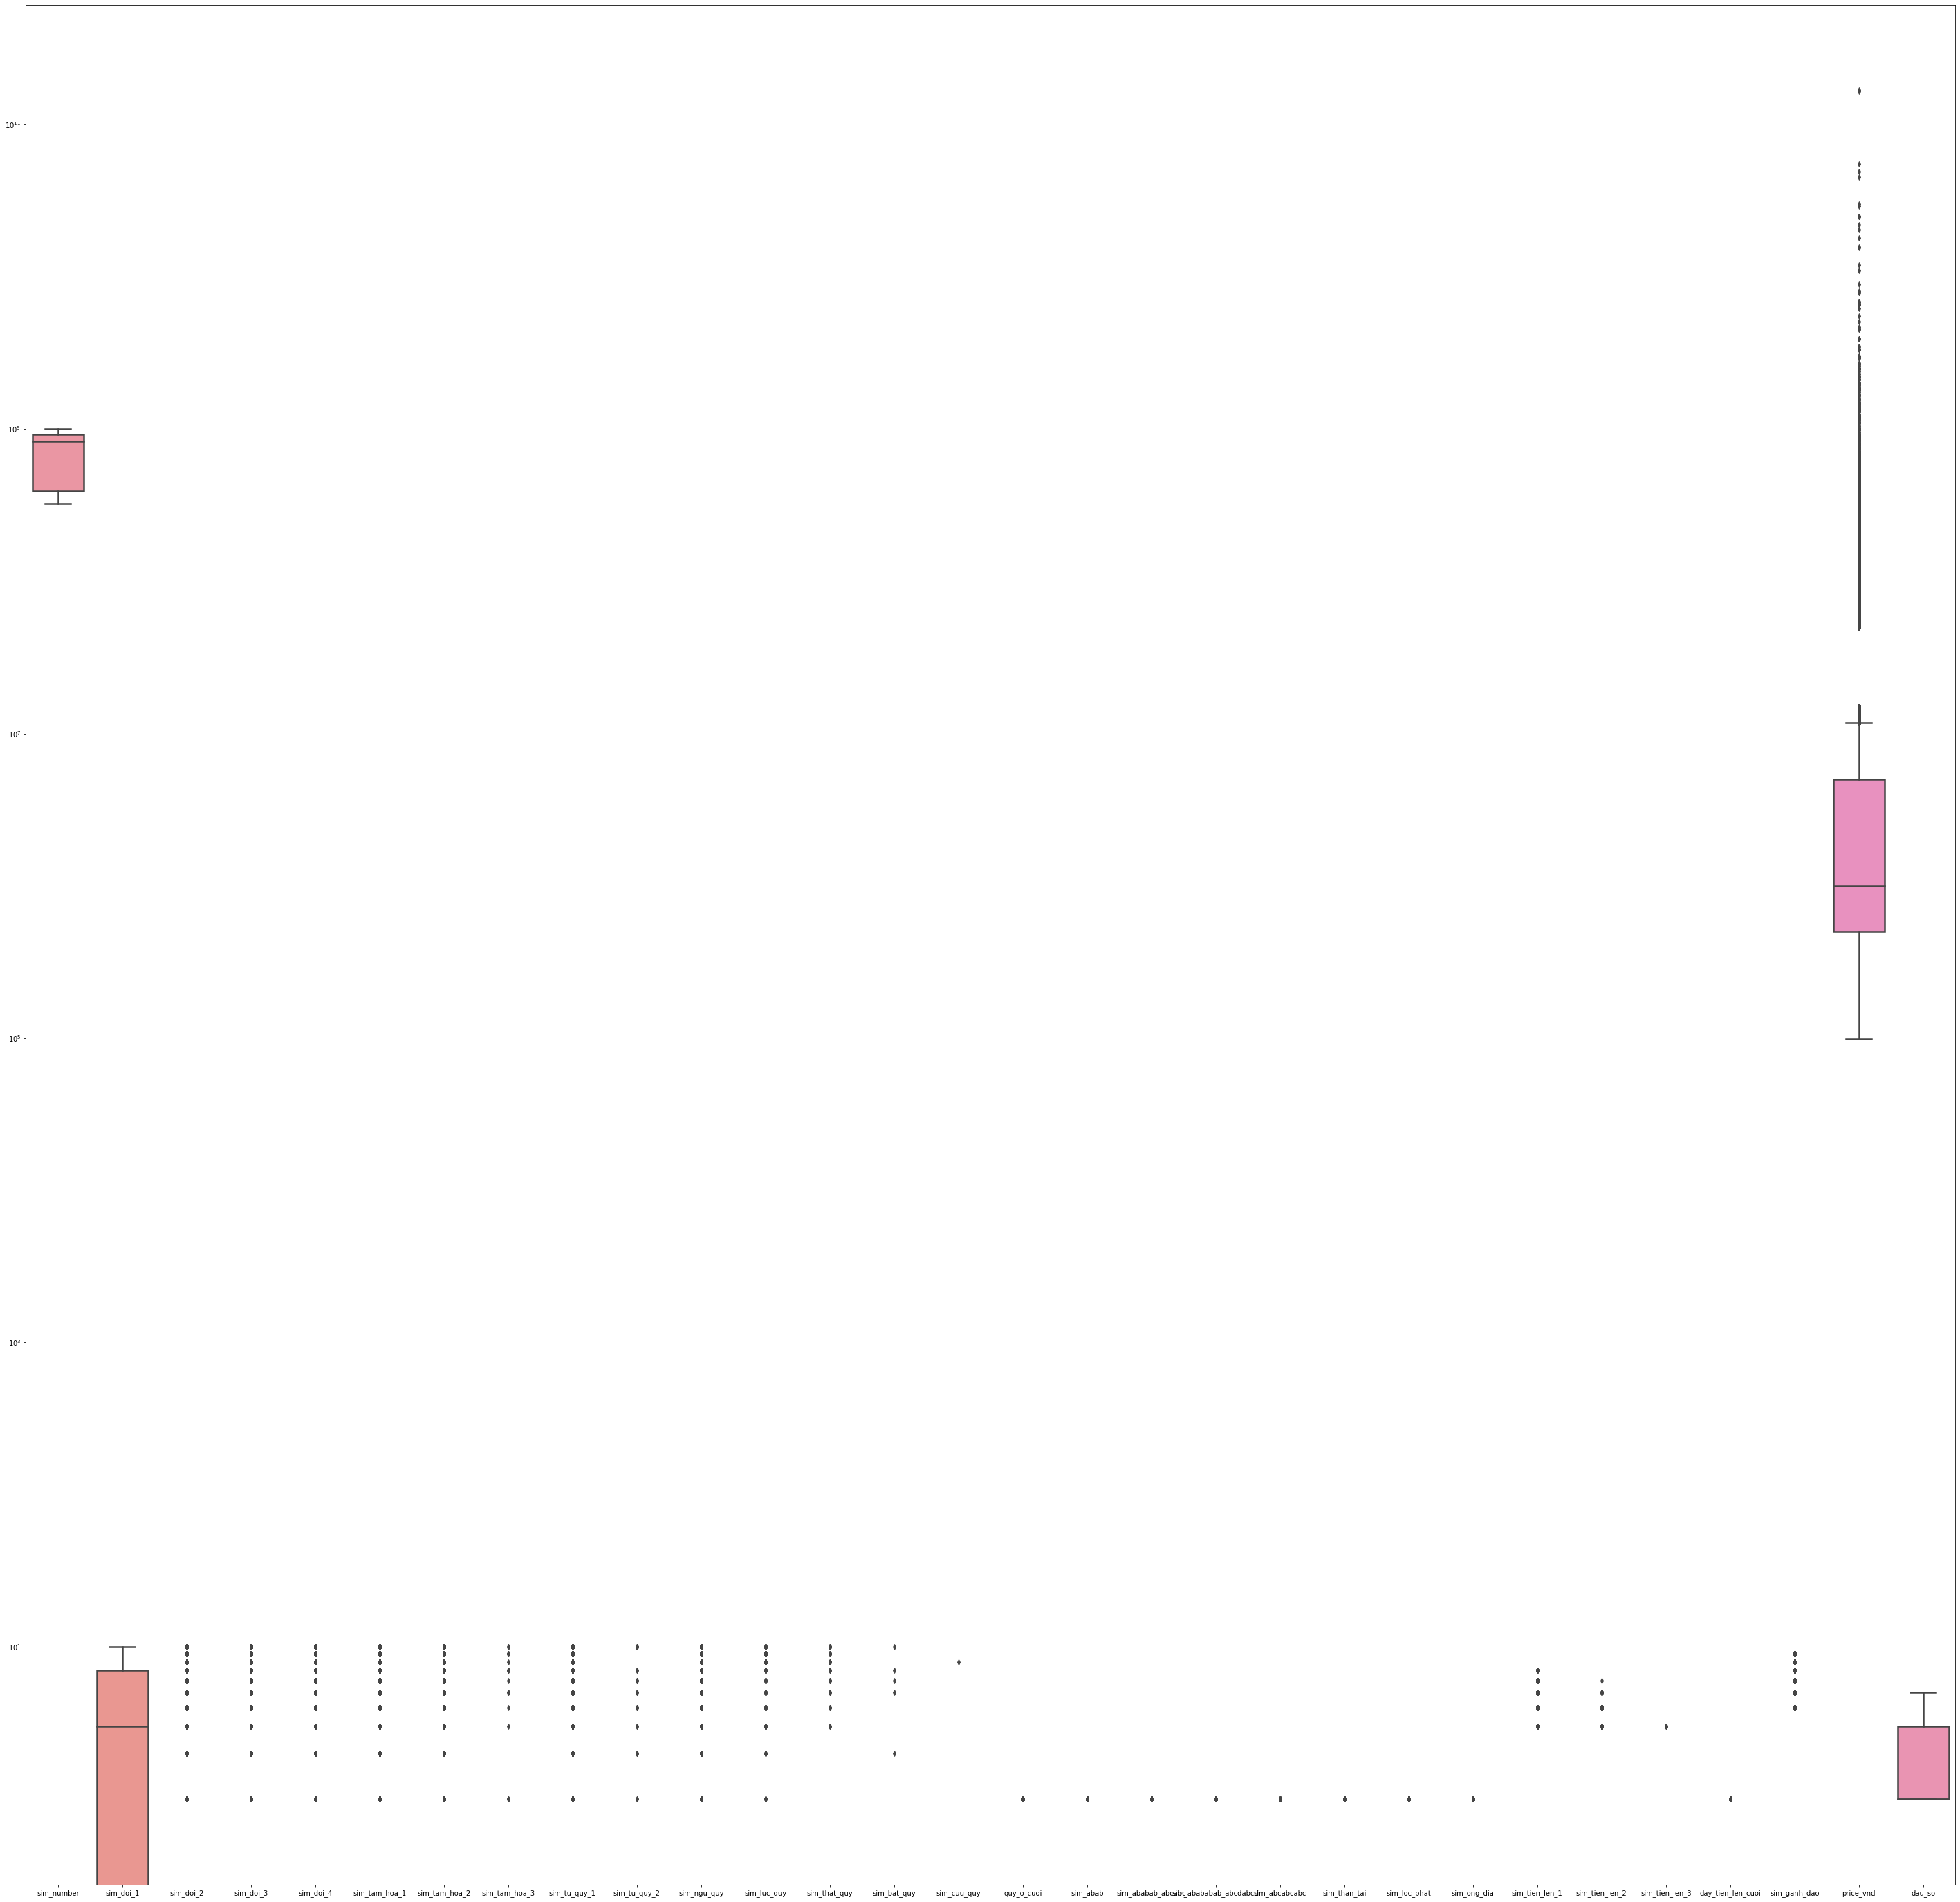

In [ ]:
# To check outliers 
import matplotlib.pyplot as plt

a4_dims = (50,50)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

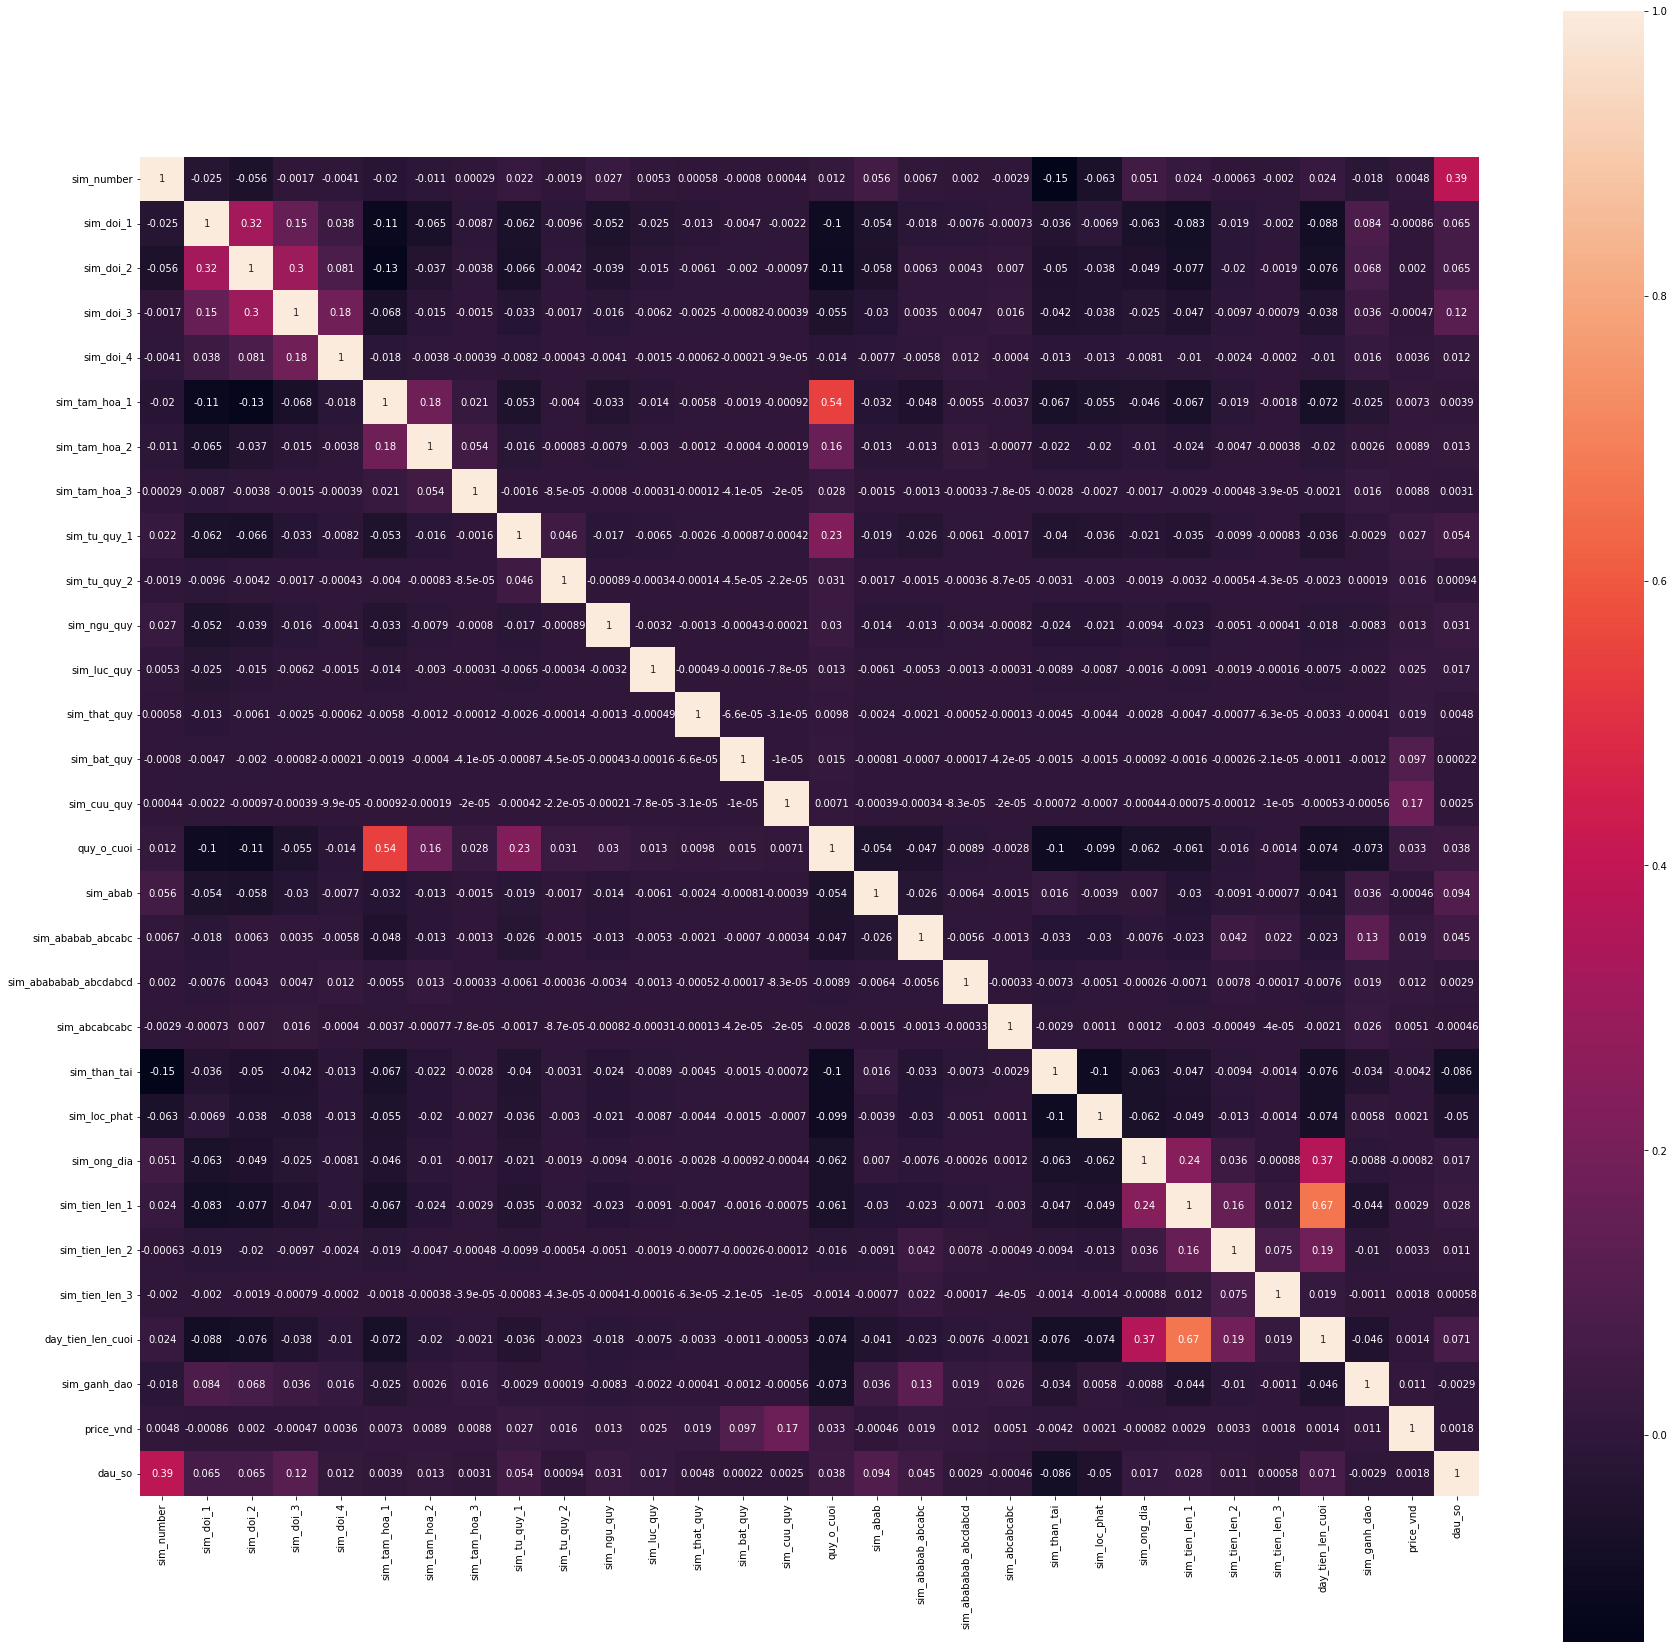

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
gif, axes = plt.subplots(figsize=(30,30))
cax = sns.heatmap(correlation, square=True, annot=True)
plt.show()

#Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [ ]:
X = df.drop(['sim_number', 'price_vnd'], 1)
y = df['price_vnd']

<ipython-input-154-aafdcea88b25>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['sim_number', 'price_vnd'], 1)


In [ ]:
X

,sim_doi_1,sim_doi_2,sim_doi_3,sim_doi_4,sim_tam_hoa_1,sim_tam_hoa_2,sim_tam_hoa_3,sim_tu_quy_1,sim_tu_quy_2,sim_ngu_quy,...,sim_abcabcabc,sim_than_tai,sim_loc_phat,sim_ong_dia,sim_tien_len_1,sim_tien_len_2,sim_tien_len_3,day_tien_len_cuoi,sim_ganh_dao,dau_so
0,8,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
1,9,-1,-1,-1,-1,-1,-1,8,-1,-1,...,0,0,0,0,0,0,0,0,0,2
2,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,5,1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,1,0,0,0,0,0,0,0,3
4,3,8,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
199996,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,3
199997,5,0,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,3
199998,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)
X_train = X
y_train = y

In [ ]:
# Feature selection by ExtraTreesRegressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
reg.feature_importances_

array([2.25267734e-01, 1.28940079e-01, 3.60337626e-03, 5.45360238e-03,
       2.68263133e-02, 1.96223909e-03, 2.51969031e-04, 5.42403803e-02,
       1.05896741e-03, 2.85505973e-03, 8.80680065e-03, 3.76208506e-03,
       3.31170641e-02, 9.57358996e-02, 3.01931862e-03, 6.39249075e-05,
       2.93865830e-02, 5.31396918e-04, 8.99088490e-05, 4.24522370e-04,
       1.44693323e-02, 2.77128264e-03, 5.03504192e-03, 1.24366168e-04,
       6.05970466e-06, 3.75987970e-03, 2.98775425e-01, 4.96605591e-02,
       8.27995400e-07])

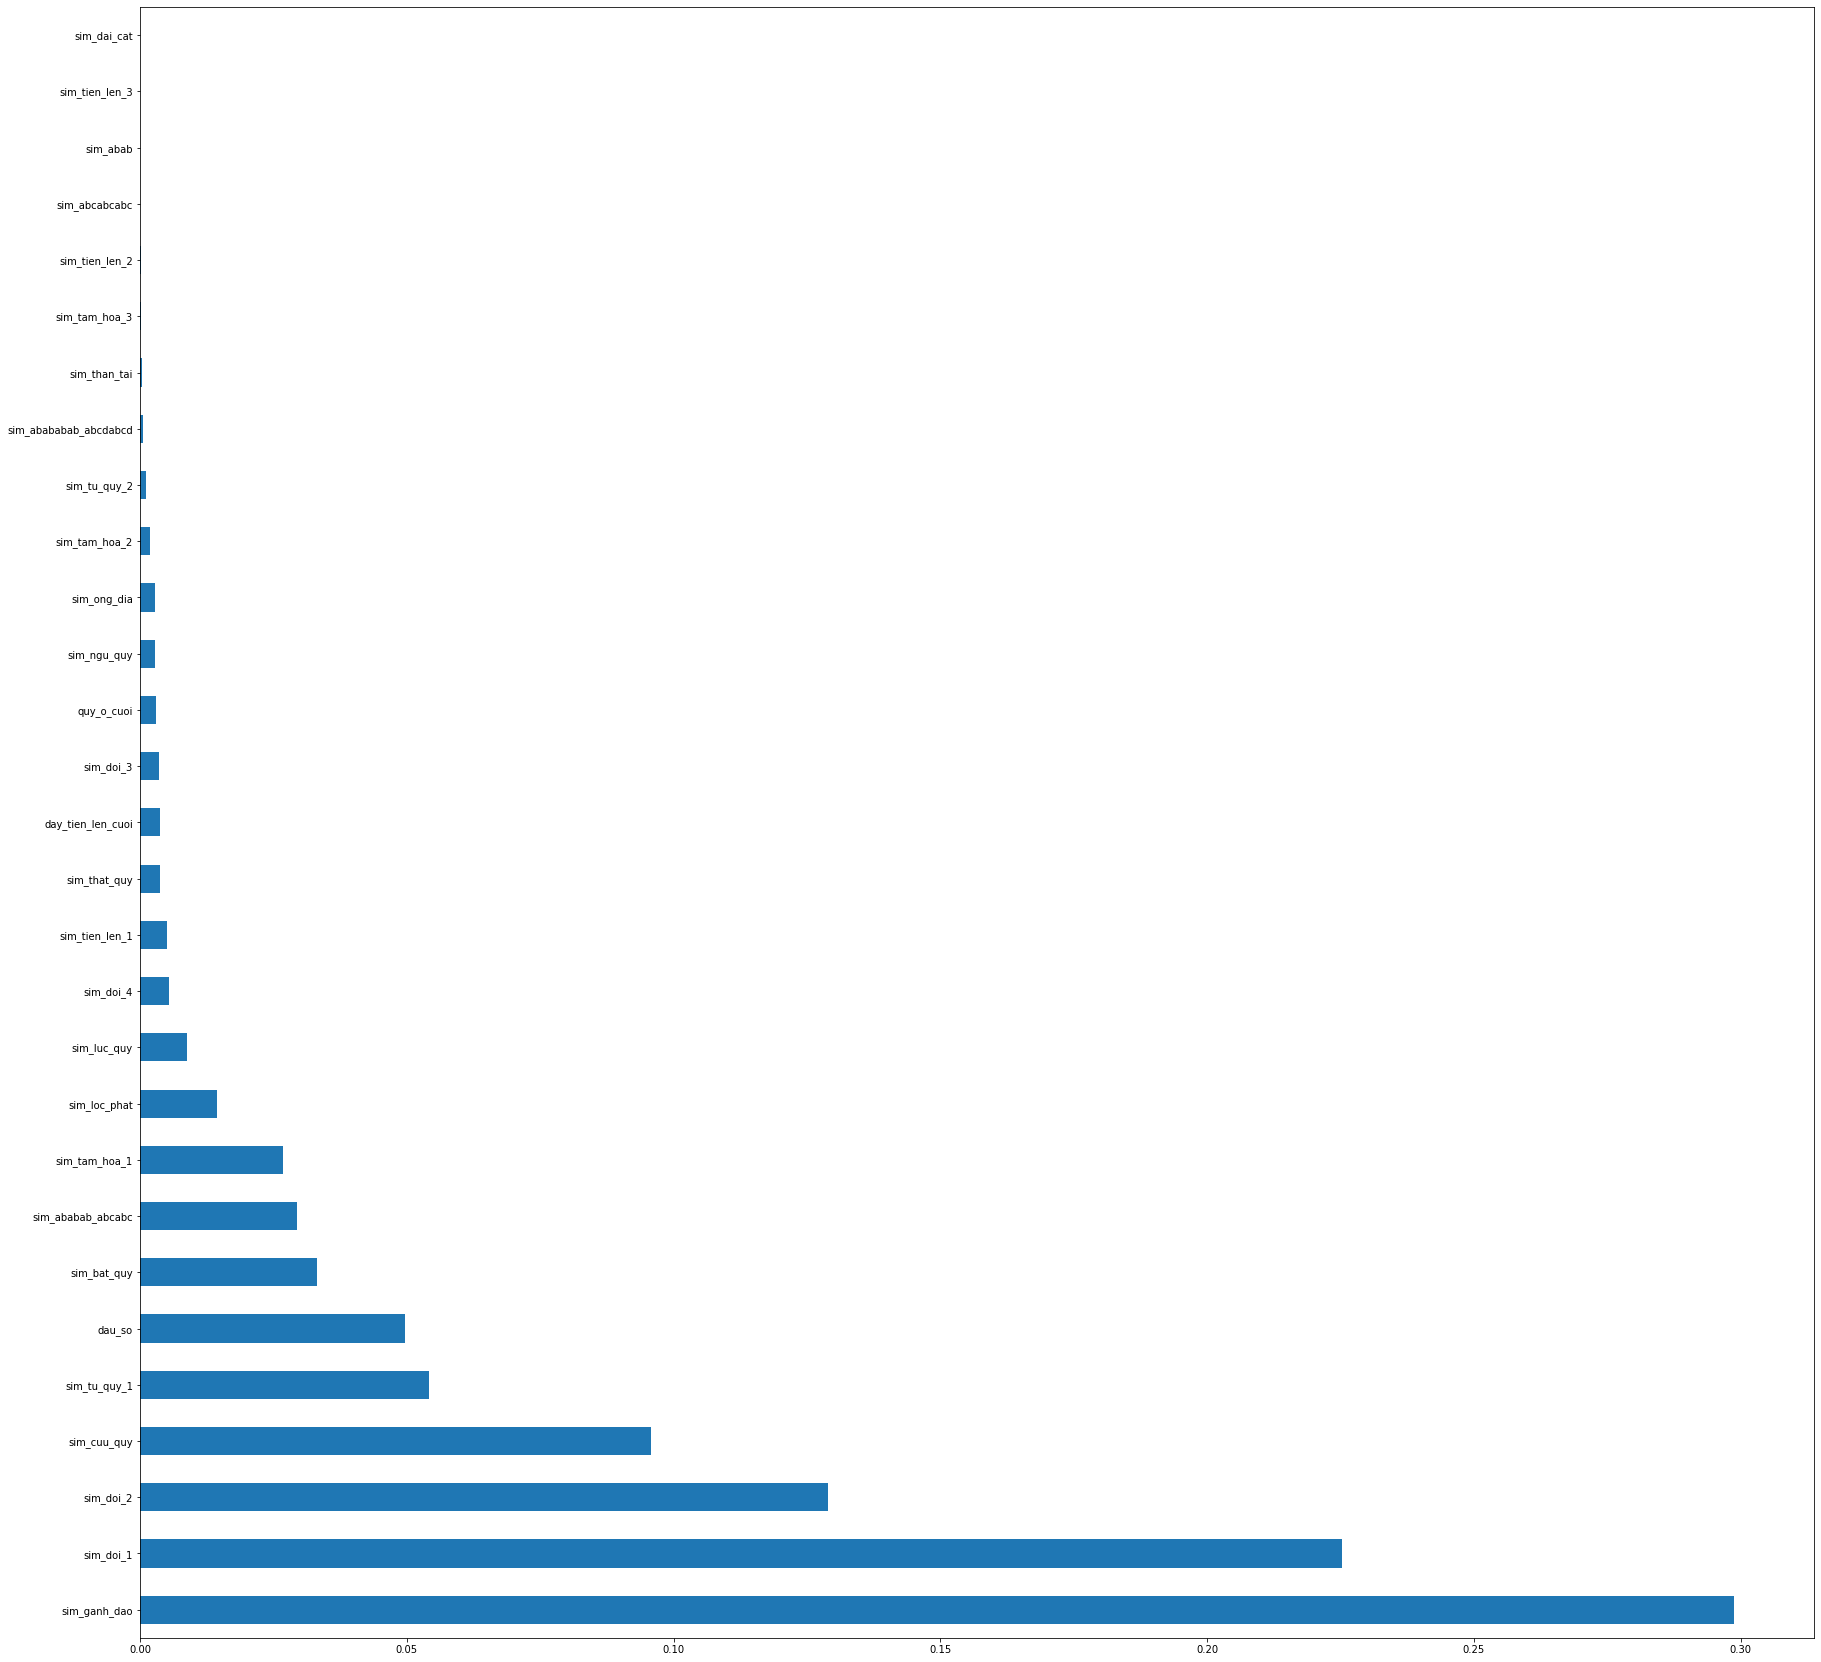

In [ ]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(29).plot(kind='barh', figsize=(30, 30))
plt.show()

In [ ]:
test1 = df.drop(['sim_tien_len_3', 'sim_abab', 'sim_abcabcabc'], 1)

<ipython-input-130-45ff0fa6df15>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test1 = df.drop(['sim_tien_len_3', 'sim_abab', 'sim_abcabcabc'], 1)


#Decision Tree Modeling

In [ ]:
X_tree = df.drop(['sim_number', 'price_vnd'], 1)
y_tree = df['price_vnd']

<ipython-input-8-fcdde1af1db4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_tree = df.drop(['sim_number', 'price_vnd'], 1)


In [ ]:
X_tree.columns

Index(['sim_doi_1', 'sim_doi_2', 'sim_doi_3', 'sim_doi_4', 'sim_tam_hoa_1',
       'sim_tam_hoa_2', 'sim_tam_hoa_3', 'sim_tu_quy_1', 'sim_tu_quy_2',
       'sim_ngu_quy', 'sim_luc_quy', 'sim_that_quy', 'sim_bat_quy',
       'sim_cuu_quy', 'quy_o_cuoi', 'sim_abab', 'sim_ababab_abcabc',
       'sim_abababab_abcdabcd', 'sim_abcabcabc', 'sim_than_tai',
       'sim_loc_phat', 'sim_ong_dia', 'sim_tien_len_1', 'sim_tien_len_2',
       'sim_tien_len_3', 'day_tien_len_cuoi', 'sim_ganh_dao', 'dau_so'],
      dtype='object')

In [ ]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, random_state= 42, test_size=0.1, shuffle=True)
X_train_tree = X_tree
y_train_tree = y_tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train_tree, y_train_tree)
# evaluate the model
tree_pred = model.predict(X_test_tree)
# evaluate predictions
mae1 = mse(y_test_tree, tree_pred)
rmse1 = np.sqrt(mse(y_test_tree, tree_pred))

print("Predicted values are: ", tree_pred[:15])
print("Real values are: ", y_test_tree[:15])

import sklearn.metrics as sm
print("Root mean squared error = %f" %rmse1 ) 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_tree, tree_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test_tree, tree_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test_tree, tree_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test_tree,tree_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test_tree, tree_pred), 2))

KeyboardInterrupt: ignored

In [ ]:
model.score(X_train_tree, y_train_tree)

In [ ]:
model.score(X_test_tree, y_test_tree)

In [ ]:
prediction=model.predict(X_test_tree)

In [ ]:
sns.distplot(y_test_tree-prediction)

#Using Standard Scaler

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train_tree)
# X_train_scaled = scaler.transform(X_train_tree)
# X_test_scaled = scaler.transform(X_test_tree)

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dtreeReg = tree.DecisionTreeRegressor()

In [ ]:
pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("dtreeReg", dtreeReg)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ["friedman_mse", "mse"]
max_depth = [16,18,20,22, 24, 26, 28, 30, 32]
parameters = dict(pca__n_components=n_components,
                      dtreeReg__criterion=criterion,
                      dtreeReg__max_depth=max_depth)

In [ ]:
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(); print(clf.best_estimator_.get_params()["dtreeReg"])

CV_Result = cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_scaled = DecisionTreeRegressor()
model_scaled.fit(X_train_scaled, y_train_tree)
# evaluate the model
tree_pred_scaled = model_scaled.predict(X_test_scaled)
# evaluate predictions
mae1 = mse(y_test_tree, tree_pred_scaled)
rmse1 = np.sqrt(mse(y_test_tree, tree_pred_scaled))

print("Predicted values are: ", tree_pred_scaled[:15])
print("Real values are: ", y_test_tree[:15])

import sklearn.metrics as sm
print("Root mean squared error = %f" %rmse1 ) 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_tree, tree_pred_scaled), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test_tree, tree_pred_scaled), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test_tree, tree_pred_scaled), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test_tree,tree_pred_scaled), 2)) 
print("R2 score =", round(sm.r2_score(y_test_tree, tree_pred_scaled), 2))

Predicted values are:  [ 3757581.2543554   1277046.2633452  10000000.          3441057.99151344
  3757581.2543554   3757581.2543554   3441057.99151344  1000000.
 33900000.           675467.09991877  5500000.          2396635.25963149
  1330799.2202729   2174993.83078731 16250781.25      ]
Real values are:  119737      450000
72272       450000
158154    10000000
65426       450000
30074       500000
23677       500000
134858      450000
176418     1000000
132467    70000000
4082        450000
74456      3000000
142133      500000
186433      450000
84660       450000
117167    69000000
Name: price_vnd, dtype: int64
Root mean squared error = 38975990.440377
Mean absolute error = 6586858.03
Mean squared error = 1519127830808366.8
Median absolute error = 1733684.45
Explain variance score = 0.82
R2 score = 0.82


#Using Get Dummies

In [ ]:
test2 = pd.get_dummies(df, columns = ['sim_tam_hoa_1', 'sim_tu_quy_1', 'sim_ngu_quy', 'sim_luc_quy', 'sim_tien_len_1'], drop_first=True)

In [ ]:
X_dm = test2.drop(['sim_number', 'price_vnd'], 1)
y_dm = test2['price_vnd']

<ipython-input-4-9c622b2f8c07>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_dm = test2.drop(['sim_number', 'price_vnd'], 1)


In [ ]:
X_dm.columns

Index(['sim_doi_1', 'sim_doi_2', 'sim_doi_3', 'sim_doi_4', 'sim_tam_hoa_2',
       'sim_tam_hoa_3', 'sim_tu_quy_2', 'sim_that_quy', 'sim_bat_quy',
       'sim_cuu_quy', 'quy_o_cuoi', 'sim_abab', 'sim_ababab_abcabc',
       'sim_abababab_abcdabcd', 'sim_abcabcabc', 'sim_than_tai',
       'sim_loc_phat', 'sim_ong_dia', 'sim_tien_len_2', 'sim_tien_len_3',
       'day_tien_len_cuoi', 'sim_ganh_dao', 'dau_so', 'sim_tam_hoa_1_0',
       'sim_tam_hoa_1_1', 'sim_tam_hoa_1_2', 'sim_tam_hoa_1_3',
       'sim_tam_hoa_1_4', 'sim_tam_hoa_1_5', 'sim_tam_hoa_1_6',
       'sim_tam_hoa_1_7', 'sim_tam_hoa_1_8', 'sim_tam_hoa_1_9',
       'sim_tu_quy_1_0', 'sim_tu_quy_1_1', 'sim_tu_quy_1_2', 'sim_tu_quy_1_3',
       'sim_tu_quy_1_4', 'sim_tu_quy_1_5', 'sim_tu_quy_1_6', 'sim_tu_quy_1_7',
       'sim_tu_quy_1_8', 'sim_tu_quy_1_9', 'sim_ngu_quy_0', 'sim_ngu_quy_1',
       'sim_ngu_quy_2', 'sim_ngu_quy_3', 'sim_ngu_quy_4', 'sim_ngu_quy_5',
       'sim_ngu_quy_6', 'sim_ngu_quy_7', 'sim_ngu_quy_8', 'sim_ngu_quy

In [ ]:
X_dm_train_tree, X_dm_test_tree, y_dm_train_tree, y_dm_test_tree = train_test_split(X_dm, y_dm, random_state= 42, test_size=0.1, shuffle=True)
X_dm_train_tree = X_dm
y_dm_train_tree = y_dm

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
fvalue_Best = SelectKBest(r_regression, k=27)
X_kbest = fvalue_Best.fit_transform(X_dm, y_dm)

# using the train test split function
X_kbest_train, X_kbest_test, y_train, y_test = train_test_split(X_kbest, y_dm, random_state= 42, test_size=0.1)
X_kbest_train = X_kbest
y_train = y_dm

In [ ]:
import sklearn.metrics as sm
tree = DecisionTreeRegressor()
tree.fit(X_kbest_train, y_train)
# evaluate the model
y_pred_tree = tree.predict(X_kbest_test)
# evaluate predictions
mae_kbest = mean_absolute_error(y_test, y_pred_tree)
rmse_kbest = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print("Predicted values are: ", y_pred_tree[:5])
print("Real values are: ", y_test[:5])

print("Root mean squared error = %f" %rmse_kbest ) 
 
print("R2 score =", round(sm.r2_score(y_test, y_pred_tree), 2))

Predicted values are:  [4465304.79733635 4465304.79733635 4465304.79733635 4465304.79733635
 4465304.79733635]
Real values are:  119737      450000
72272       450000
158154    10000000
65426       450000
30074       500000
Name: price_vnd, dtype: int64
Root mean squared error = 63058348.949129
R2 score = 0.53


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dm = DecisionTreeRegressor()
model_dm.fit(X_dm_train_tree, y_dm_train_tree)
# evaluate the model
tree_pred_dm = model_dm.predict(X_dm_test_tree)
# evaluate predictions
mae1 = mse(y_dm_test_tree, tree_pred_dm)
rmse1 = np.sqrt(mse(y_dm_test_tree, tree_pred_dm))

print("Predicted values are: ", tree_pred_dm[:15])
print("Real values are: ", y_dm_test_tree[:15])

import sklearn.metrics as sm
print("Root mean squared error = %f" %rmse1 ) 
print("Mean absolute error =", round(sm.mean_absolute_error(y_dm_test_tree, tree_pred_dm), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_dm_test_tree, tree_pred_dm), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_dm_test_tree, tree_pred_dm), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_dm_test_tree,tree_pred_dm), 2)) 
print("R2 score =", round(sm.r2_score(y_dm_test_tree, tree_pred_dm), 2))

Predicted values are:  [ 3757581.2543554   1277046.2633452  10000000.          3441057.99151344
  3757581.2543554   3757581.2543554   3441057.99151344  1000000.
 33900000.           675467.09991877  5500000.          2396635.25963149
  1330799.2202729   2174993.83078731 16250781.25      ]
Real values are:  119737      450000
72272       450000
158154    10000000
65426       450000
30074       500000
23677       500000
134858      450000
176418     1000000
132467    70000000
4082        450000
74456      3000000
142133      500000
186433      450000
84660       450000
117167    69000000
Name: price_vnd, dtype: int64
Root mean squared error = 38975990.440377
Mean absolute error = 6586858.03
Mean squared error = 1519127830808366.8
Median absolute error = 1733684.45
Explain variance score = 0.82
R2 score = 0.82


#Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_dm.tree_.max_depth

80

In [ ]:
parameters={"max_depth" : [31,32,33,34,35,36,37]}
# 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30

In [ ]:
tuning_model=GridSearchCV(model_dm,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(X_dm, y_dm);


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END .............max_depth=31;, score=-794281682.475 total time=   1.4s
[CV 2/3] END .............max_depth=31;, score=-353086739.005 total time=   1.5s
[CV 3/3] END .............max_depth=31;, score=-697214214.965 total time=   1.4s
[CV 1/3] END .............max_depth=32;, score=-794252339.709 total time=   1.4s
[CV 2/3] END .............max_depth=32;, score=-352872334.442 total time=   1.4s
[CV 3/3] END .............max_depth=32;, score=-697210776.197 total time=   1.4s
[CV 1/3] END .............max_depth=33;, score=-791386600.567 total time=   1.5s
[CV 2/3] END .............max_depth=33;, score=-352938922.387 total time=   1.5s
[CV 3/3] END .............max_depth=33;, score=-696927499.694 total time=   1.5s
[CV 1/3] END .............max_depth=34;, score=-791361908.176 total time=   1.5s
[CV 2/3] END .............max_depth=34;, score=-352885900.605 total time=   1.5s
[CV 3/3] END .............max_depth=34;, score=-6

In [ ]:
tuning_model.best_params_


{'max_depth': 33}

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=33)

In [ ]:
tuned_hyper_model.fit(X_dm,y_dm)

DecisionTreeRegressor(max_depth=33)

In [ ]:

tuned_tree_pred = tuned_hyper_model.predict(X_dm_test_tree)
# evaluate predictions
mae_tuned = mse(y_dm_test_tree, tuned_tree_pred)
rmse_tuned = np.sqrt(mse(y_dm_test_tree, tuned_tree_pred))

# print("Predicted values are: ", tuned_tree_pred[:15])
# print("Real values are: ", y_test_tree[:15])

import sklearn.metrics as sm
print("Root mean squared error = %f" %rmse_tuned ) 
# print("Mean absolute error =", round(sm.mean_absolute_error(y_test_tree, tuned_tree_pred), 2)) 
# print("Mean squared error =", round(sm.mean_squared_error(y_test_tree, tuned_tree_pred), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_test_tree, tuned_tree_pred), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(y_test_tree,tuned_tree_pred), 2)) 
# print("R2 score =", round(sm.r2_score(y_test_tree, tuned_tree_pred), 2))

Root mean squared error = 39790636.675153
